In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
# Load dataset
df = pd.read_csv(r"C:\Users\safe\Desktop\multi-domain-data-analysis-portfolio\data\project4_covid19\country_wise_latest.csv")

df.head()


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [4]:
# Check column names
print(df.columns)


Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')


In [5]:
# Dataset overview
print("Shape:", df.shape)
df.describe()


Shape: (187, 15)


C:\Users\safe\AppData\Roaming\Python\Python312\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


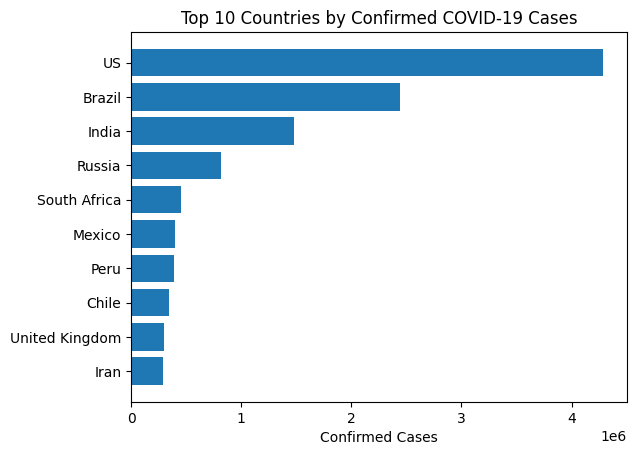

In [6]:
# Top 10 countries by confirmed cases
top_confirmed = df.sort_values(by='Confirmed', ascending=False).head(10)

plt.figure()
plt.barh(top_confirmed['Country/Region'], top_confirmed['Confirmed'])
plt.xlabel("Confirmed Cases")
plt.title("Top 10 Countries by Confirmed COVID-19 Cases")
plt.gca().invert_yaxis()
plt.show()


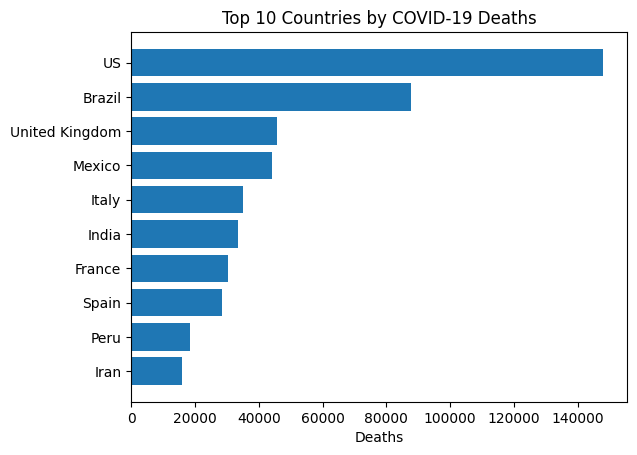

In [7]:
# Top 10 countries by deaths
top_deaths = df.sort_values(by='Deaths', ascending=False).head(10)

plt.figure()
plt.barh(top_deaths['Country/Region'], top_deaths['Deaths'])
plt.xlabel("Deaths")
plt.title("Top 10 Countries by COVID-19 Deaths")
plt.gca().invert_yaxis()
plt.show()


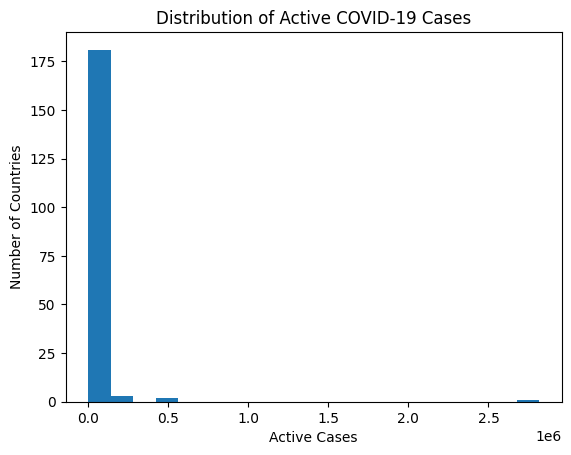

In [8]:
# Active cases distribution
plt.figure()
plt.hist(df['Active'], bins=20)
plt.title("Distribution of Active COVID-19 Cases")
plt.xlabel("Active Cases")
plt.ylabel("Number of Countries")
plt.show()


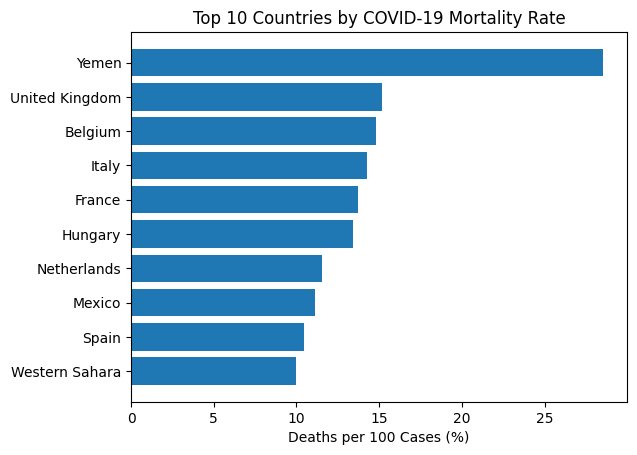

In [9]:
# Mortality rate analysis
top_mortality = df.sort_values(by='Deaths / 100 Cases', ascending=False).head(10)

plt.figure()
plt.barh(top_mortality['Country/Region'], top_mortality['Deaths / 100 Cases'])
plt.xlabel("Deaths per 100 Cases (%)")
plt.title("Top 10 Countries by COVID-19 Mortality Rate")
plt.gca().invert_yaxis()
plt.show()


In [10]:
# WHO region summary
region_summary = df.groupby('WHO Region')[['Confirmed', 'Deaths', 'Recovered']].sum()
region_summary


,Confirmed,Deaths,Recovered
WHO Region,,,
Africa,723207,12223,440645
Americas,8839286,342732,4468616
Eastern Mediterranean,1490744,38339,1201400
Europe,3299523,211144,1993723
South-East Asia,1835297,41349,1156933
Western Pacific,292428,8249,206770


## Key Insights – COVID-19 Analysis

- Countries with the highest confirmed cases also show high active case counts.
- Mortality rates vary significantly, indicating differences in healthcare systems.
- WHO regions show unequal burden of confirmed and death cases.
- Some countries have high recovery ratios, suggesting effective medical response.
